In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from textblob import TextBlob

In [5]:
data = pd.read_csv('data/raw_analyst_ratings.csv')

In [6]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


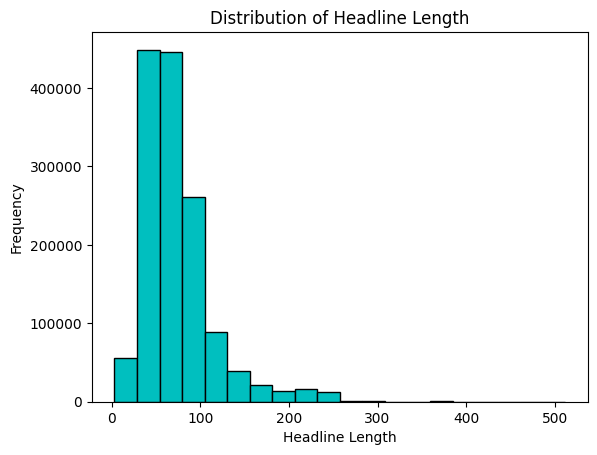

In [8]:
# Descriptive Statistics
data['headline_length'] = data['headline'].str.len()
data['headline_length'].describe()

plt.hist(data['headline_length'], bins=20, color='c', edgecolor='black')
plt.title('Distribution of Headline Length')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

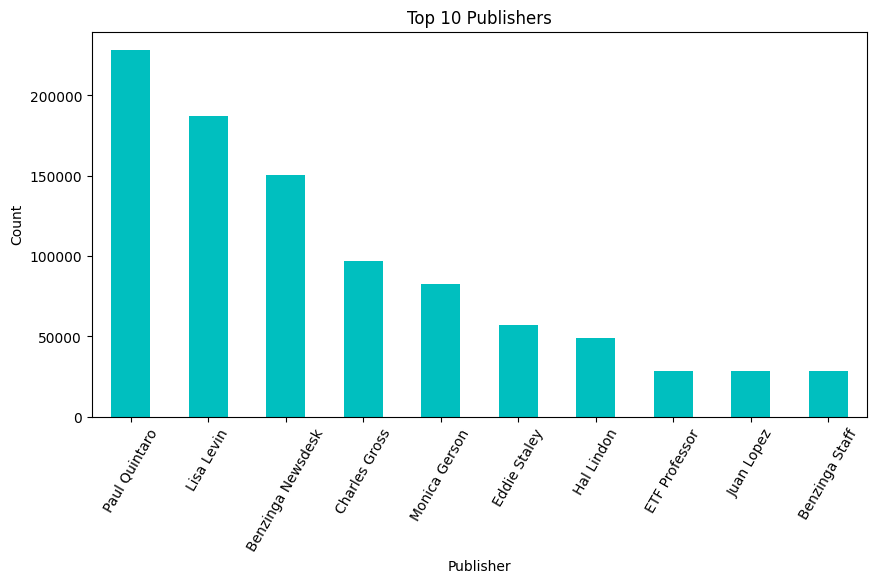

In [44]:
#publisher analysis

publisher=data['publisher'].value_counts()

plt.figure(figsize=(10,5))
publisher.head(10).plot(kind='bar', color='c')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=60) 
plt.show()

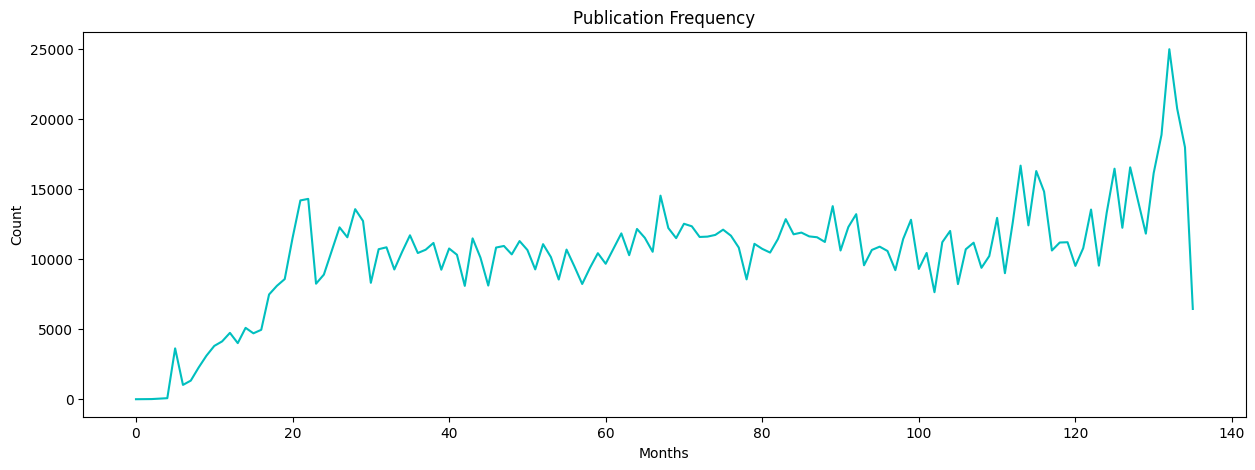

In [9]:
#publication frequency
data['date'] = pd.to_datetime(data['date'], format='ISO8601')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

publication_freq = data.groupby(['year', 'month']).size()
publication_freq = publication_freq.reset_index()
publication_freq.columns = ['Year', 'Month', 'Count']

plt.figure(figsize=(15,5))
plt.plot(publication_freq['Count'], color='c')
plt.title('Publication Frequency')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()


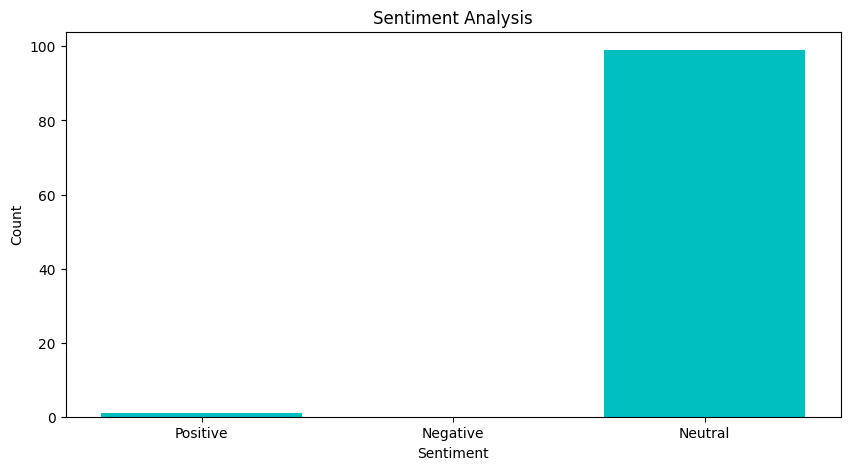

In [12]:
sentiment_analysis = []
for headline in data['headline'].head(100):
  sentiment = TextBlob(headline).sentiment
  sentiment_analysis.append({
      "original_headline": headline,  
      "sentiment": sentiment,
      "sentiment_category": "Positive" if sentiment.polarity > 0.5 else ("Negative" if sentiment.polarity < -0.5 else "Neutral")
  })
  
# sentiment counts
sentiment_categories = ["Positive", "Negative", "Neutral"]
sentiment_values = [len([s for s in sentiment_analysis if s["sentiment_category"] == "Positive"]),
                    len([s for s in sentiment_analysis if s["sentiment_category"] == "Negative"]),
                    len([s for s in sentiment_analysis if s["sentiment_category"] == "Neutral"])]

# create line plot
plt.figure(figsize=(10,5))
plt.bar(sentiment_categories, sentiment_values, color='c')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



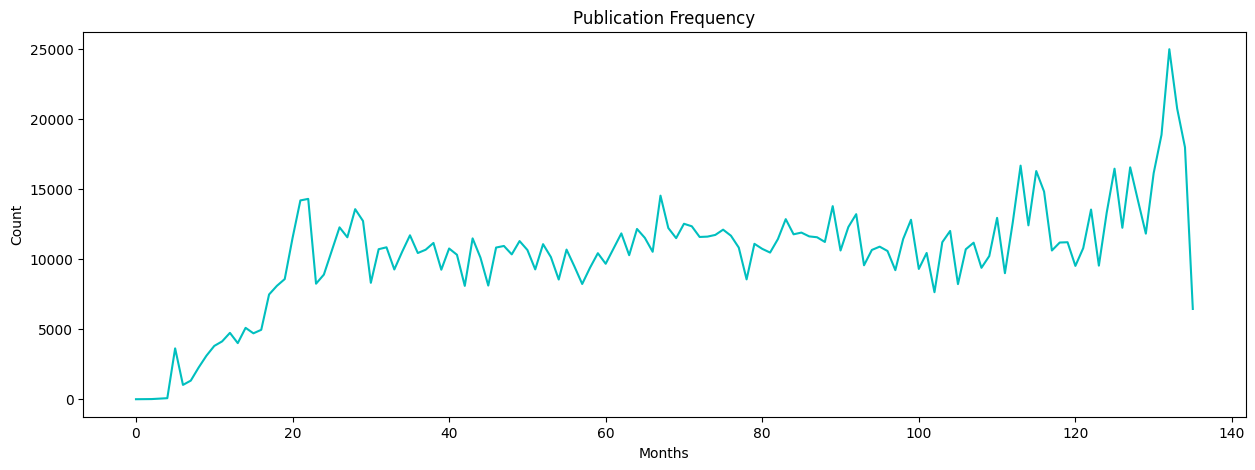

In [26]:
#Time series Analysis
data['date'] = pd.to_datetime(data['date'], format='ISO8601')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

publication_freq = data.groupby(['year', 'month']).size()
publication_freq = publication_freq.reset_index()
publication_freq.columns = ['Year', 'Month', 'Count']

plt.figure(figsize=(15,5))
plt.plot(publication_freq['Count'], color='c')
plt.title('Publication Frequency')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()
